In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ct = pd.read_csv('clinicaltrial_data.csv')
mouse = pd.read_csv('mouse_drug_data.csv')

In [3]:
ct.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
combined = pd.merge(ct,mouse,on='Mouse ID')

In [6]:
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
mean_tumor = combined.groupby(by=['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

In [8]:
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
ste_tumor = combined.groupby(by=['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

In [10]:
ste_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
ref = mean_tumor.pivot_table(values='Tumor Volume (mm3)',index='Timepoint',columns='Drug')

In [12]:
ref

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
columns_markers= {'Capomulin': 'o', 'Infubinol':'^', 'Ketapril':'s', 'Placebo':'D'}
markers = ["o","^","D","s"]

In [14]:
for key, value in columns_markers.items():
    print(key,value)

Capomulin o
Infubinol ^
Ketapril s
Placebo D


In [15]:
ste_tumor[ste_tumor['Drug']=='Capomulin']['Tumor Volume (mm3)']

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
5    0.881642
6    0.934460
7    1.052241
8    1.223608
9    1.223977
Name: Tumor Volume (mm3), dtype: float64

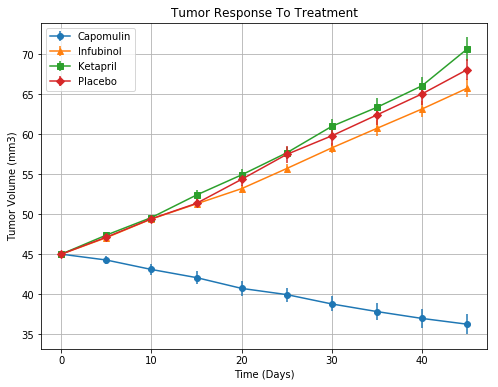

In [16]:
fig=plt.figure(figsize=(8, 6))
plt.grid()
for column, marker in columns_markers.items():
    error = ste_tumor[ste_tumor['Drug']==column]['Tumor Volume (mm3)']
    plt.errorbar(x=ref.index,y=ref[column],yerr=error,label=column,marker=marker)
    plt.xlabel('Time (Days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.legend(loc='upper left')
    plt.title('Tumor Response To Treatment')

In [17]:
meta = combined.groupby(by=['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

In [18]:
meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
meta_er = combined.groupby(by=['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

In [20]:
meta_er.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [21]:
meta_ref = meta.pivot_table(values='Metastatic Sites',index='Timepoint',columns='Drug')

In [22]:
meta_ref

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


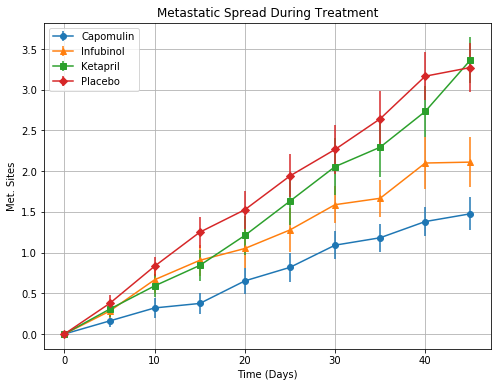

In [23]:
fig=plt.figure(figsize=(8, 6))
plt.grid()
for column, marker in columns_markers.items():
    error = meta_er[meta_er['Drug']==column]['Metastatic Sites']
    plt.errorbar(x=meta_ref.index,y=meta_ref[column],yerr=error,label=column,marker=marker)
    plt.xlabel('Time (Days)')
    plt.ylabel('Met. Sites')
    plt.legend(loc='upper left')
    plt.title('Metastatic Spread During Treatment')

In [24]:
mice = combined.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()

In [25]:
mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
mice_ref = mice.pivot_table(values='Mouse ID',index='Timepoint',columns='Drug')

In [27]:
mice_ref

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


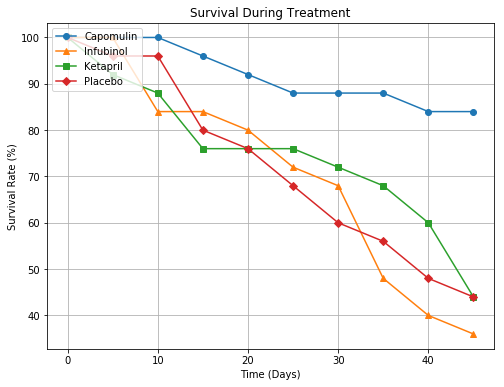

In [28]:
fig=plt.figure(figsize=(8, 6))
plt.grid()
for column, marker in columns_markers.items():
    plt.plot(mice_ref.index,(mice_ref[column]/25)*100,label=column,marker=marker)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival Rate (%)')
    plt.legend(loc='upper left')
    plt.title('Survival During Treatment')

In [29]:
pct_change = ((ref.iloc[-1:]-45)/45)*100

In [30]:
pct_change = pct_change[['Capomulin','Ketapril','Infubinol','Placebo']]

In [31]:
pct_change

Drug,Capomulin,Ketapril,Infubinol,Placebo
Timepoint,,,,
45,-19.475303,57.028795,46.123472,51.29796


In [33]:
pct_changes = (pct_change["Capomulin"],
               pct_change["Infubinol"],
               pct_change["Ketapril"],
               pct_change["Placebo"])

In [37]:
type(pct_changes)

tuple

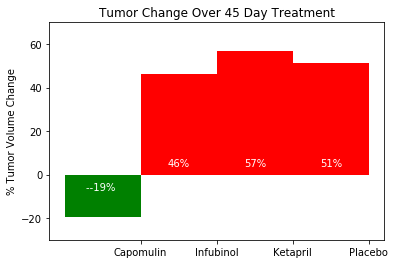

In [40]:
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')


ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])


def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")


autolabelPass(rectsPass)
autolabelFail(rectsFail)



# Three Considerations
1. Capomulin was the best performing drug, having a significant decrease in Tumor volume compared to the other drugs
2. Infubinol had the second best results for metastatic spread compared to Ketapril and Placebo, but had the worst survival rate.
3. Ketapril was almost virtually no different than placebo and in some analyses worse. 